In [ ]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.0.0+cu118
2.0.1+cu118


In [ ]:
import os
import requests #to download files
import shutil

In [ ]:
_SAMPLE_DIR = 'files' #this is the folder that we are creating to store the audio files

SAMPLE_WAV_URL = "https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.wav"
SAMPLE_WAV_PATH = os.path.join(_SAMPLE_DIR,'steam.wav')
SAMPLE_MP3_URL = "https://download.pytorch.org/torchaudio/tutorial-assets/steam-train-whistle-daniel_simon.mp3"
SAMPLE_MP3_PATH = os.path.join(_SAMPLE_DIR,'steam.mp3')
SAMPLE_MP3_PATH = os.path.join(_SAMPLE_DIR, "steam.mp3")
SAMPLE_WAV_SPEECH_URL = "https://pytorch-tutorial-assets.s3.amazonaws.com/VOiCES_devkit/source-16k/train/sp0307/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav"
SAMPLE_WAV_SPEECH_PATH = os.path.join(_SAMPLE_DIR, "speech.wav")
SAMPLE_NOISE_URL = "https://pytorch-tutorial-assets.s3.amazonaws.com/VOiCES_devkit/distant-16k/distractors/rm1/babb/Lab41-SRI-VOiCES-rm1-babb-mc01-stu-clo.wav"
SAMPLE_NOISE_PATH = os.path.join(_SAMPLE_DIR, "bg.wav")

os.makedirs(_SAMPLE_DIR, exist_ok=True)#this is where we have created the folder

def fetch_audio_file(url, path):
  with open(path,'wb') as file_:
    file_.write(requests.get(url).content)

fetch_audio_file(SAMPLE_WAV_URL,SAMPLE_WAV_PATH)
fetch_audio_file(SAMPLE_MP3_URL,SAMPLE_MP3_PATH)
fetch_audio_file(SAMPLE_WAV_SPEECH_URL,SAMPLE_WAV_SPEECH_PATH)
fetch_audio_file(SAMPLE_NOISE_URL,SAMPLE_NOISE_PATH)

In [ ]:
#now we will get the info about the audio or the audio metadata from url or localized
with requests.get(SAMPLE_WAV_URL, stream = True) as response: #for URL
  filedata = response.raw
  metadata = torchaudio.info(filedata, format='wav')
  print(f"Fetched {filedata.tell()} Bytes")

print(metadata)

print(torchaudio.info('/content/files/bg.wav', format='wav')) # for Downloaded

Fetched 8192 Bytes
AudioMetaData(sample_rate=44100, num_frames=109368, num_channels=2, bits_per_sample=16, encoding=PCM_S)
AudioMetaData(sample_rate=16000, num_frames=80000, num_channels=1, bits_per_sample=16, encoding=PCM_S)


/usr/local/lib/python3.9/dist-packages/torchaudio/backend/sox_io_backend.py:106: UserWarning: File-like object support in sox_io backend is deprecated, and will be removed in v2.1. See https://github.com/pytorch/audio/issues/2950 for the detail.Please migrate to the new dispatcher, or use soundfile backend.
  warnings.warn(_deprecation_message)


In [ ]:
#we will load the audio file
waveform, sample_rate = torchaudio.load(SAMPLE_WAV_SPEECH_PATH)

waveform.shape, sample_rate #sample_rate is an integer
#waveform.shape gives us a pytorch tensor where first vale tells us about number of channels and next value tells us about the number of frames in one second

(torch.Size([1, 54400]), 16000)

In [ ]:
#play audio
from IPython.display import Audio,display
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()#create a numpy array

  num_channels, num_frames = waveform.shape
  if(num_channels == 1):
    display(Audio(waveform[0], rate = sample_rate))
  elif(num_channels == 2):
    display(Audio((waveform[0], waveform[1]), rate = sample_rate))
  elif(num_channels == 3):
    display(Audio((waveform[0], waveform[1],waveform[2]), rate = sample_rate))
  else:
    raise ValueError('Waveform more than 2 wave has not been implemented by me')

play_audio(waveform,sample_rate)

In [ ]:
#plot the waveform and spectogram
import matplotlib.pyplot as plt


def _plot(waveform,sample_rate,title):
  waveform = waveform.numpy()
  num_channels, num_frames = waveform.shape

  time_axis = torch.arange(0, num_frames) / sample_rate
  figure, axes = plt.subplots(num_channels, 1)

  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    if(title == 'Waveform'):
      axes[c].plot(time_axis, waveform[c], linewidth=1)
      axes[c].grid(True)
    else:
      axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels>1:
      axes[c].set_ylabel(f'Channel {c+1}')
  figure.suptitle(title)
  plt.show(block = False)

def plot_waveform(waveform,sample_rate):
  _plot(waveform, sample_rate, title ='Waveform')

def plot_specgram(waveform,sample_rate):
  _plot(waveform, sample_rate, title ='Spectogram')

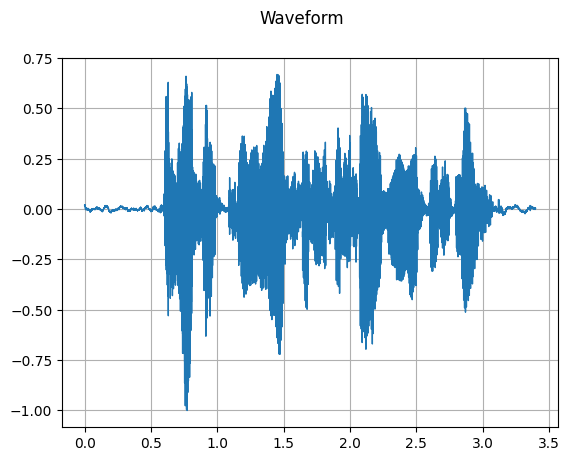

In [ ]:
plot_waveform(waveform, sample_rate)

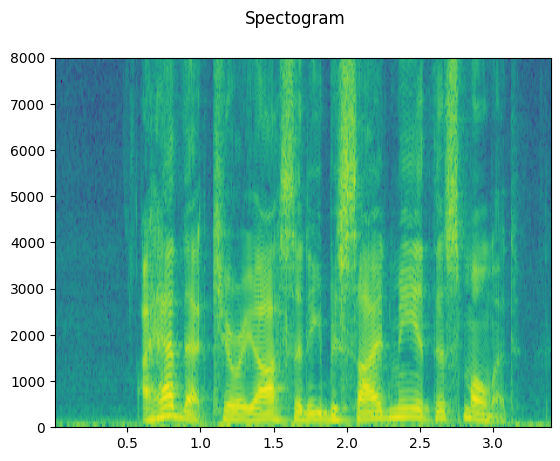

In [ ]:
plot_specgram(waveform, sample_rate)

In [ ]:
#save audio
path = f"{_SAMPLE_DIR}/save_example_default.wav"
torchaudio.save(path, waveform, sample_rate, encoding = 'PCM_S', bits_per_sample = 16, format='wav') #default is bits_persample is default to 32 we can also change to mp3 then it changes to mp3

path = f"{_SAMPLE_DIR}/save_example_default2.mp3"
torchaudio.save(path, waveform, sample_rate, format='mp3')

In [ ]:
#testing saved files
metadata = torchaudio.info(path)
print(metadata)
waveform, sample_rate = torchaudio.load(path)
play_audio(waveform, sample_rate)

AudioMetaData(sample_rate=16000, num_frames=55872, num_channels=1, bits_per_sample=0, encoding=MP3)


In [ ]:
#RESAMPLIN
#we Resample the  data from one frequency to other

import torchaudio.transforms as T
import torchaudio.functional as F

waveform,sample_rate = torchaudio.load(path)

resample_rate = 32000
resampler = T.Resample(sample_rate, resample_rate, dtype=waveform.dtype)
resampled_waveform1 = resampler(waveform)

resampled_waveform2 = F.resample(waveform, sample_rate, resample_rate)

play_audio(waveform, sample_rate)
play_audio(resampled_waveform1, resample_rate)
play_audio(resampled_waveform2, resample_rate)

#parameter
#Lowpass filter width
#Larger lowpass_filter_Width -> sharper, more precise filter, but more computationally expensive
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, lowpass_filter_width=12)
play_audio(resampled_waveform, resample_rate)

#Rolloff
#Lower Rolloff reduces the amount of aliasing but it will also reduce some of the higher frequencies
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, rolloff = 0.99)
play_audio(resampled_waveform, resample_rate)

#window
#by default -> Hann Window Filter
resampled_waveform = F.resample(waveform, sample_rate, resample_rate, resampling_method='sinc_interpolation')
play_audio(resampled_waveform, resample_rate)

resampled_waveform = F.resample(waveform, sample_rate, resample_rate, resampling_method='kaiser_window')
play_audio(resampled_waveform, resample_rate)


In [ ]:
#AUDIO DATA AUGMENTATION
# - Applying effects and filtering
# - Adding background noise
# - Applying codec to Tensor Object

In [ ]:
torchaudio.sox_effects.effect_names()

['allpass',
 'band',
 'bandpass',
 'bandreject',
 'bass',
 'bend',
 'biquad',
 'chorus',
 'channels',
 'compand',
 'contrast',
 'dcshift',
 'deemph',
 'delay',
 'dither',
 'divide',
 'downsample',
 'earwax',
 'echo',
 'echos',
 'equalizer',
 'fade',
 'fir',
 'firfit',
 'flanger',
 'gain',
 'highpass',
 'hilbert',
 'loudness',
 'lowpass',
 'mcompand',
 'norm',
 'oops',
 'overdrive',
 'pad',
 'phaser',
 'pitch',
 'rate',
 'remix',
 'repeat',
 'reverb',
 'reverse',
 'riaa',
 'silence',
 'sinc',
 'speed',
 'stat',
 'stats',
 'stretch',
 'swap',
 'synth',
 'tempo',
 'treble',
 'tremolo',
 'trim',
 'upsample',
 'vad',
 'vol']

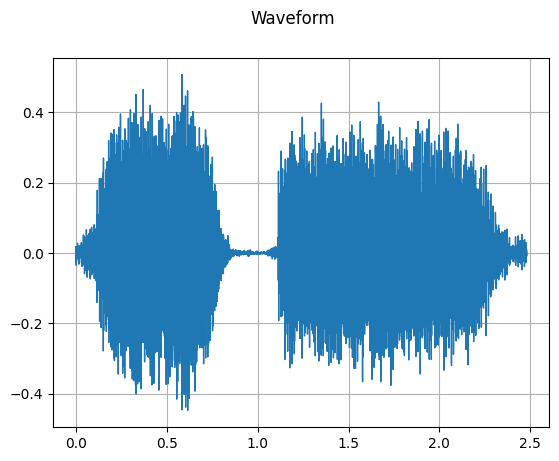

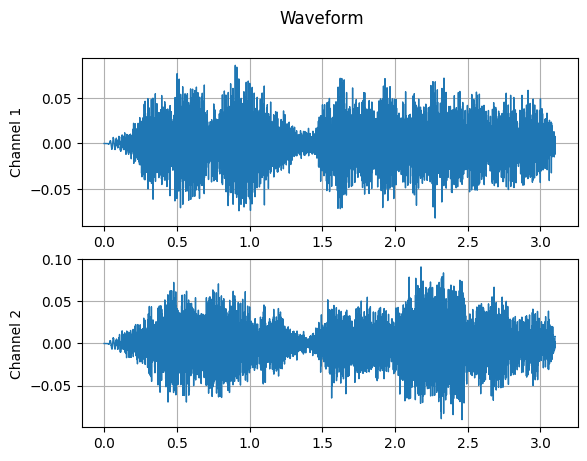

In [ ]:
# Apply effects to file
def get_sample(path, resample=16000):
  effects = [
    ["remix", "1"],
    ["lowpass", f"{resample // 2}"],
    ["rate", f'{resample}'],
    ]
  waveform, sample_rate = torchaudio.sox_effects.apply_effects_file(path, effects=effects)
  return waveform, sample_rate

waveform1, sample_rate1 = get_sample(SAMPLE_WAV_PATH, resample=16000)
plot_waveform(waveform1, sample_rate1)
print()

# Apply effects to tensor
effects = [
  ["lowpass", "-1", "300"], # apply single-pole lowpass filter
  ["speed", "0.8"],  # reduce the speed
                     # This only changes sample rate, so it is necessary to
                     # add `rate` effect with original sample rate after this.
  ["rate", f"{sample_rate1}"],
  ["reverb", "-w"],  # Reverbration gives some dramatic feeling
]

waveform2, sample_rate2 = torchaudio.sox_effects.apply_effects_tensor(waveform1, sample_rate1, effects)

plot_waveform(waveform2, sample_rate2)

In [ ]:
import numpy as np
play_audio(waveform1, sample_rate1)
play_audio(waveform2, sample_rate2)

Noise:



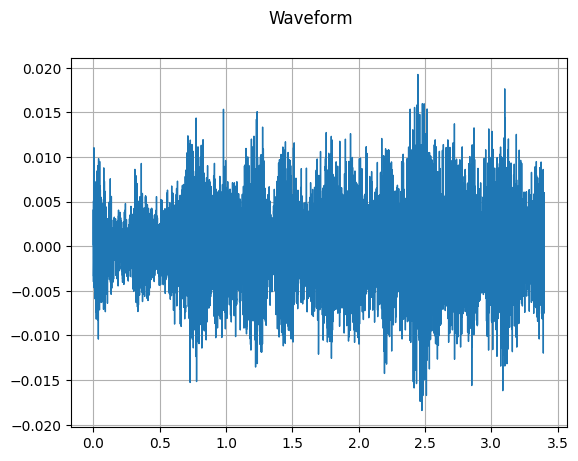

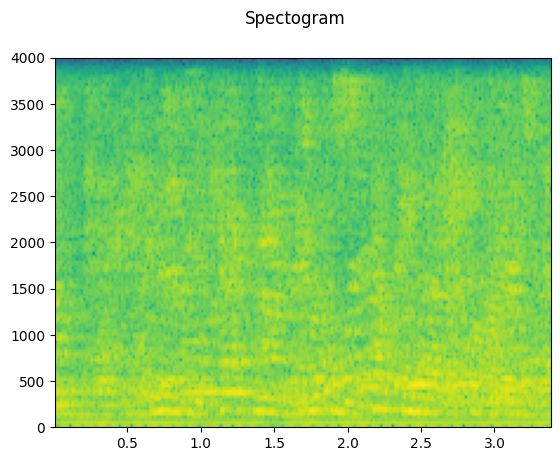

SNR: 20 [dB]



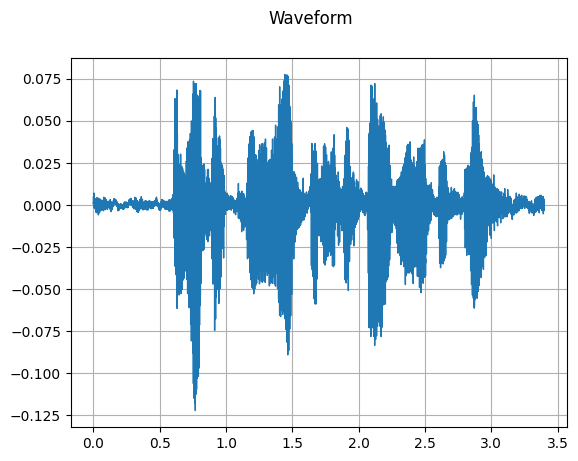

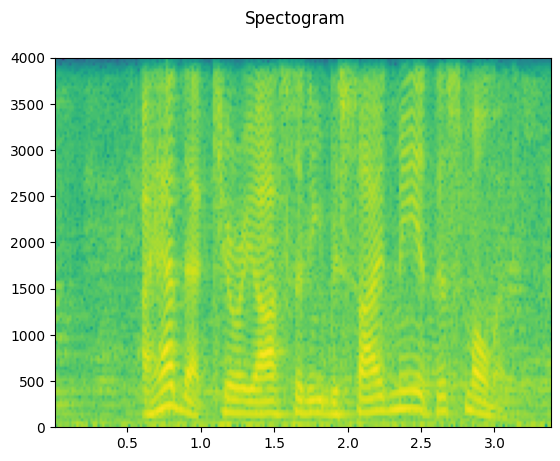

SNR: 10 [dB]



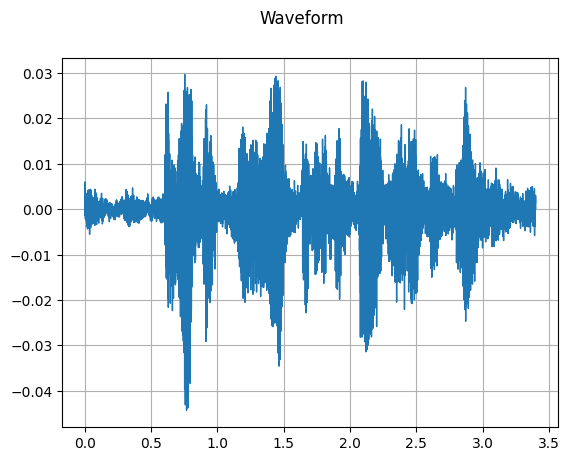

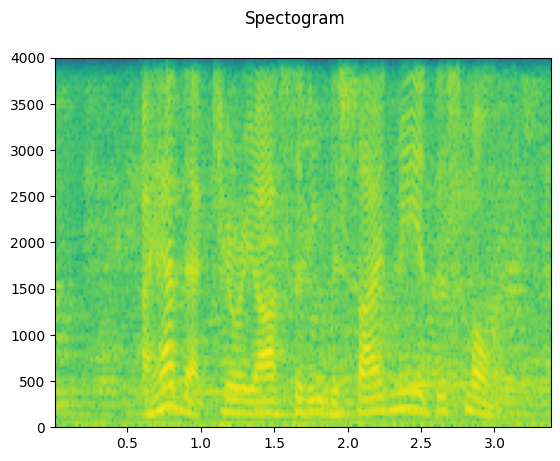

SNR: 3 [dB]



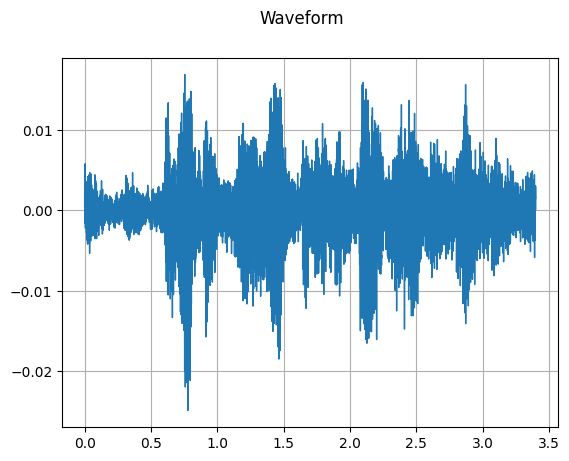

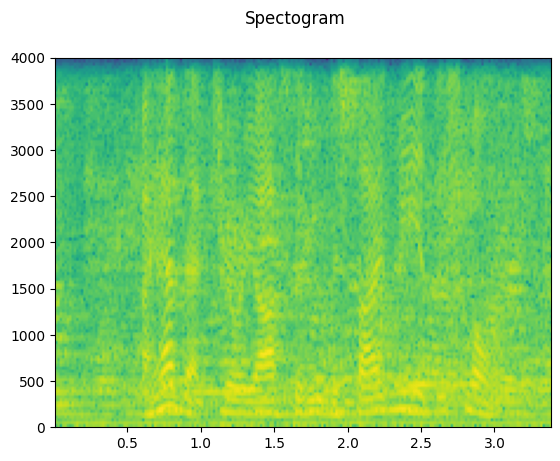

SNR: 3 [dB]



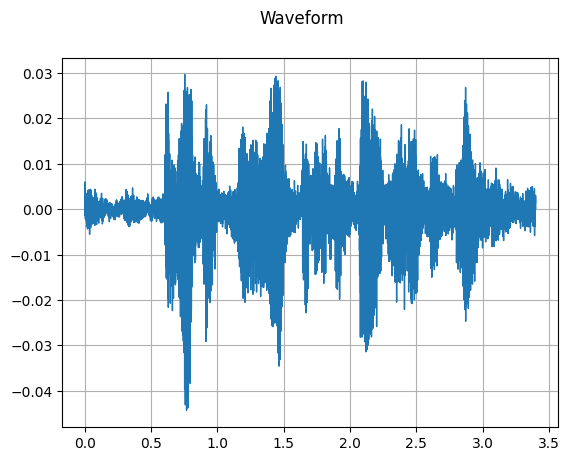

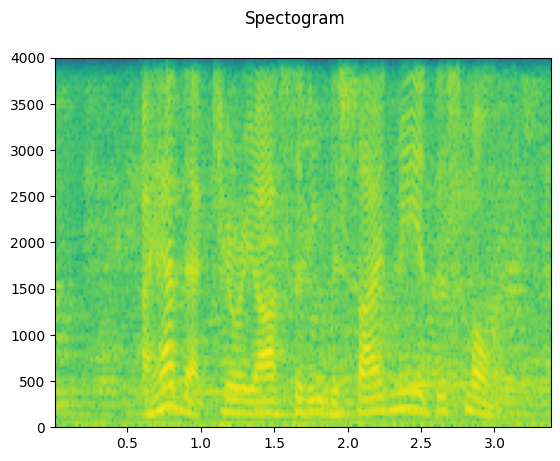

In [ ]:
# Add background noise -> manually scale/add tensors
import math
sample_rate = 8000
speech, _ = get_sample(SAMPLE_WAV_SPEECH_PATH, resample=sample_rate)
noise, _ = get_sample(SAMPLE_NOISE_PATH, resample=sample_rate)
noise = noise[:, :speech.shape[1]] #we want the same shape so we take same number of frames

print('Noise:\n')
plot_waveform(noise, sample_rate)
plot_specgram(noise, sample_rate)
play_audio(noise, sample_rate) #plot the data

speech_power = speech.norm(p=2)
noise_power = noise.norm(p=2) #basically we are finding the power of our signal

for snr_db in [20, 10, 3]: #signal noise ratio higer the number more we understand signal
  snr = math.exp(snr_db / 10)
  scale = snr * noise_power / speech_power
  noisy_speech = (scale * speech + noise) / 2
  print(f'SNR: {snr_db} [dB]\n')
  plot_waveform(noisy_speech, sample_rate)
  plot_specgram(noisy_speech, sample_rate)
  play_audio(noisy_speech, sample_rate)


snr = math.exp(10 / 10)
scale = snr * noise_power / speech_power
noisy_speech = (scale * speech + noise) / 2
print(f'SNR: {snr_db} [dB]\n')
plot_waveform(noisy_speech, sample_rate)
plot_specgram(noisy_speech, sample_rate)
play_audio(noisy_speech, sample_rate)
path = f"{_SAMPLE_DIR}/sound_with_noise.wav"
torchaudio.save(path, noisy_speech, sample_rate, encoding = 'PCM_S', bits_per_sample = 16, format='wav')

In [ ]:
# Apply codec
waveform, sample_rate = get_sample(SAMPLE_WAV_SPEECH_PATH, resample=8000)

configs = [
    {"format": "wav", "encoding": 'ULAW', "bits_per_sample": 8},
    {"format": "gsm"},
    {"format": "mp3", "compression": -9},
    {"format": "vorbis", "compression": -1}
]

for param in configs:
  print(param)
  augmented = F.apply_codec(waveform, sample_rate, **param)
  play_audio(augmented, sample_rate)

{'format': 'wav', 'encoding': 'ULAW', 'bits_per_sample': 8}


/usr/local/lib/python3.9/dist-packages/torchaudio/backend/sox_io_backend.py:416: UserWarning: File-like object support in sox_io backend is deprecated, and will be removed in v2.1. See https://github.com/pytorch/audio/issues/2950 for the detail.Please migrate to the new dispatcher, or use soundfile backend.
  warnings.warn(_deprecation_message)
/usr/local/lib/python3.9/dist-packages/torchaudio/backend/sox_io_backend.py:235: UserWarning: File-like object support in sox_io backend is deprecated, and will be removed in v2.1. See https://github.com/pytorch/audio/issues/2950 for the detail.Please migrate to the new dispatcher, or use soundfile backend.
  warnings.warn(_deprecation_message)


{'format': 'gsm'}


{'format': 'mp3', 'compression': -9}


{'format': 'vorbis', 'compression': -1}


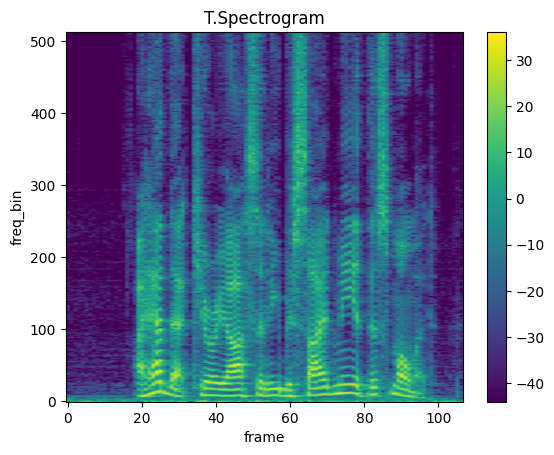

In [ ]:
# AUDIO FEATURE EXTRACTIONS
# Spectrogram: To get the frequency make-up of an audio signal as it varies with time, you can use Spectrogram.

waveform, sample_rate = get_sample(SAMPLE_WAV_SPEECH_PATH, resample=16000)

n_fft = 1024
win_length = None
hop_length = 512

# define transformation
spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
)
# Perform transformation
spec = spectrogram(waveform)

import librosa
# librosa is a python package for music and audio analysis.
def plot_spectrogram(spec):
  fig, axs = plt.subplots(1, 1)
  axs.set_title('T.Spectrogram')
  axs.set_ylabel('freq_bin')
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect='auto')
  fig.colorbar(im, ax=axs)
  plt.show(block=False)


plot_spectrogram(spec[0])

In [ ]:
#Datasets where we can datasets
YESNO_DATASET_PATH = os.path.join(_SAMPLE_DIR, "yes_no")
os.makedirs(YESNO_DATASET_PATH, exist_ok=True)

dataset = torchaudio.datasets.YESNO(YESNO_DATASET_PATH, download=True)

waveform, sample_rate, label = dataset[0]
play_audio(waveform, sample_rate)

100%|██████████| 4.49M/4.49M [00:00<00:00, 5.32MB/s]


In [ ]:
#here we try removing the sound
import torchaudio

filename = '/content/files/sound_with_noise.wav'
waveform, sample_rate = torchaudio.load(filename)
import numpy as np
import librosa

waveform = waveform.numpy()[0]
stft = librosa.stft(waveform)
noise_stft = np.minimum.reduce(stft, axis=1)
clean_stft = stft - noise_stft[:, np.newaxis]
clean_waveform = librosa.istft(clean_stft)

play_audio(clean_waveform, sample_rate)

AttributeError: ignored

In [ ]:
import torch
import torchaudio
import tensorflow as tf

filename = "/content/files/sound_with_noise.wav"
waveform, sample_rate = torchaudio.load(filename)
print(waveform.shape)
import librosa

spectrogram = librosa.stft(waveform.numpy()[0], n_fft=2048, hop_length=512)
spectrogram_mag = librosa.amplitude_to_db(abs(spectrogram))

import numpy as np

noise_mag = np.mean(spectrogram_mag[:, :20], axis=1)

clean_spectrogram_mag = np.maximum(spectrogram_mag - noise_mag[:, np.newaxis], 0)

clean_spectrogram = librosa.db_to_amplitude(clean_spectrogram_mag)
clean_waveform = librosa.istft(clean_spectrogram, hop_length=512)
clean_waveform = torch.tensor(clean_waveform)
clean_waveform.resize_(1,list(clean_waveform.shape)[0])
print(clean_waveform.shape)
# Save the cleaned audio file
path = f"{_SAMPLE_DIR}/cleaned_audio.wav"
torchaudio.save(path, torch.tensor(clean_waveform), sample_rate, encoding = 'PCM_S', bits_per_sample = 16, format='wav')
play_audio(clean_waveform,sample_rate)

torch.Size([1, 27200])
torch.Size([1, 27136])


<ipython-input-76-5c11ad1195a9>:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torchaudio.save(path, torch.tensor(clean_waveform), sample_rate, encoding = 'PCM_S', bits_per_sample = 16, format='wav')


In [ ]:
import torch
import torchaudio

filename = "/content/files/sound_with_noise.wav"
audio, sr = torchaudio.load(filename)
play_audio(audio,sr)
import pywt

wavelet = 'db4'  # Choose the Daubechies wavelet
level = 4  # Choose the level of decomposition

coeffs = pywt.wavedec(audio[0], wavelet, level=level)

reconstructed_audio = pywt.waverec(coeffs, wavelet)
reconstructed_audio = torch.from_numpy(reconstructed_audio).float()

cA4, cD4, cD3, cD2, cD1 = coeffs

cA4_only = [cA4, None, None, None, None] # Keep only cA4 and set other coefficients to None
reconstructed_audio = pywt.waverec(cA4_only, wavelet)
reconstructed_audio = torch.from_numpy(reconstructed_audio).float()

reconstructed_audio.resize_(1,list(clean_waveform.shape)[0])
path = f"{_SAMPLE_DIR}/cleaned_audio2.wav"
torchaudio.save(path, reconstructed_audio, sr, encoding = 'PCM_S', bits_per_sample = 16, format='wav')
play_audio(reconstructed_audio,sr)

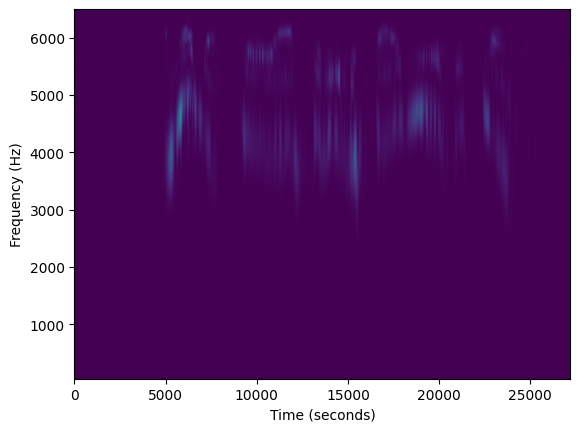

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.io import wavfile

# Load audio file
fs, audio = wavfile.read('/content/files/sound_with_noise.wav')

# Define wavelet and scales
wavelet = 'morl'
scales = np.arange(1, 128)

# Calculate CWT coefficients
coefficients, frequencies = pywt.cwt(audio, scales, wavelet, sampling_period=1/fs)

# Calculate scalogram (magnitude squared of CWT coefficients)
scalogram = np.abs(coefficients)**2

# Plot scalogram
plt.imshow(scalogram, extent=[0, audio.shape[-1], frequencies[-1], frequencies[0]], cmap='viridis', aspect='auto')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()
